In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# To generate synthetic datasets for clustering problems.
# Suppose to have k:3
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-4.79552471, -8.67790521],
       [-3.88769313, -8.26416519],
       [-9.83808225, -6.04917178],
       ...,
       [-5.04653411, -8.90383399],
       [-4.7321949 , -8.69408229],
       [-8.88142006,  6.00787245]])

In [4]:
y

array([2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1,
       2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       0, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0,
       2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 1, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 0, 2, 2,

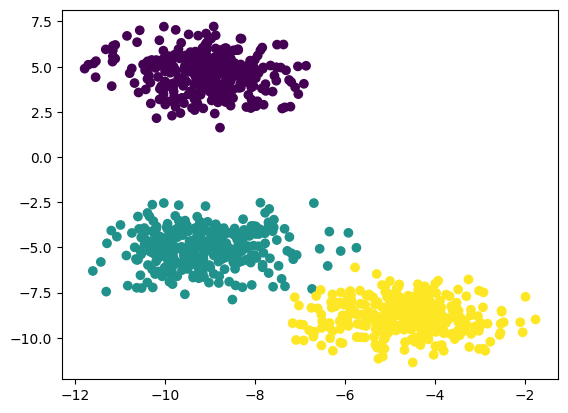

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
from sklearn.cluster import KMeans

## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [9]:
wcss

[1340.0000000000005,
 448.1515157578226,
 134.3804152860269,
 110.07242470073787,
 89.12369224873078,
 60.59013497207056,
 67.53380544255235,
 52.49423798521687,
 41.19761533122163,
 38.129468957437524]

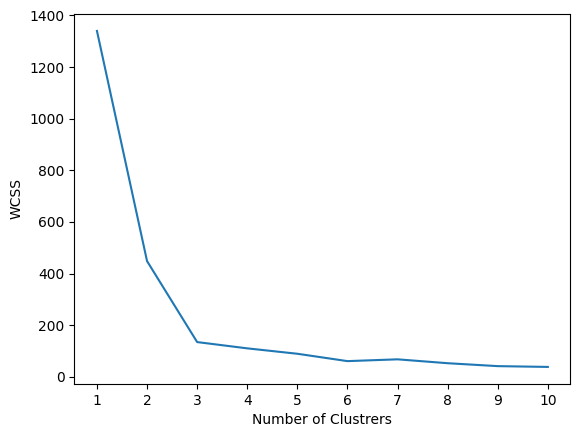

In [10]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [12]:
kmeans.fit_predict(X_train_scaled)

array([2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 2, 0, 2, 0,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2,
       1, 2, 2, 0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1, 0,
       2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 1,

In [13]:
y_pred=kmeans.predict(X_test_scaled)

In [14]:
y_pred

array([1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 0, 1,
       1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1,
       1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 0, 2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2,
       0, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 2,
       2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0,
       1, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 0, 1,
       0, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1,
       1, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 2,
       2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2,

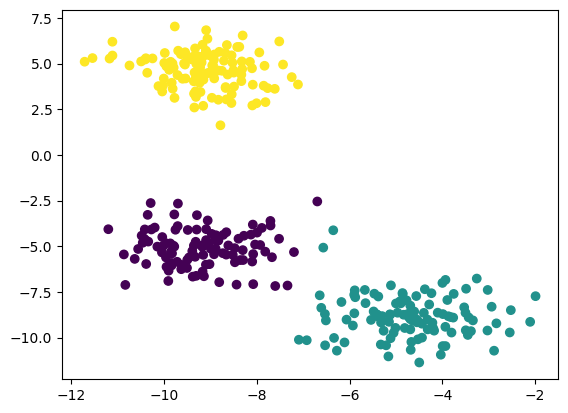

In [15]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [16]:
## Validating the k value
## ---------------------------
## kneelocator technique
## Silhoutee scoring technique

In [17]:
## kneelocator
!pip install kneed

In [19]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [20]:
kl.elbow

3

In [21]:
## Silhoutte score
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[0.6050735957068054,
 0.6979339231738141,
 0.5916279208269853,
 0.5132032540001628,
 0.44694915480622105,
 0.4195015217729697,
 0.4053304846794215,
 0.4004352822427274,
 0.3749945109640623]

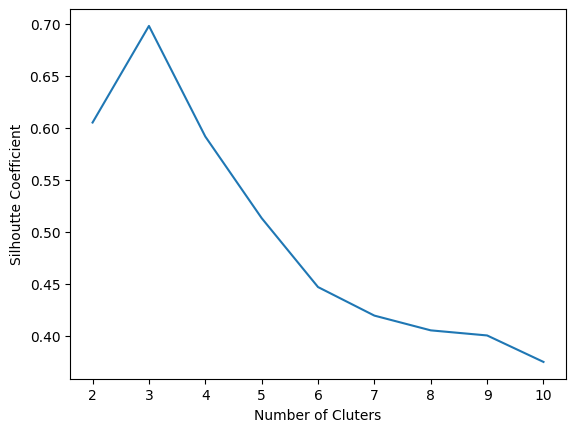

In [24]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coefficient")
plt.show()

## Selected k: the one has highest coefficient -> 3